In [ ]:
## EDA: 
## Merge file/ then, EDA
## 

In [202]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [2]:
os.listdir()

['inspect_cars.csv',
 'FCG Germany GmbH_Data Scientist_case study_Auctions.csv',
 'Untitled.ipynb',
 'FCG Germany GmbH_Data Scientist_case study_Inspections.csv',
 'used_car_preprocess-Copy1.ipynb',
 'report_cars.csv',
 'README.md',
 '.ipynb_checkpoints',
 '.git']

In [5]:
inspect_cars = pd.read_csv('inspect_cars.csv')
report_cars = pd.read_csv('report_cars.csv')

/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (181) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
auction = pd.read_csv('FCG Germany GmbH_Data Scientist_case study_Auctions.csv')

In [26]:
duration = pd.to_datetime(auction['auction_end_date'])-pd.to_datetime(auction['auction_start_date'])
auction['auction_duration'] = duration.dt.components['minutes']

In [27]:
auction_inspect = pd.merge(auction, inspect_cars, on = 'car_id')

In [28]:
inspect_cars.shape, report_cars.shape, auction_inspect.shape, auction.shape

((21160, 20), (21160, 191), (24043, 37), (24053, 18))

In [58]:
auction_inspect.keys()

Index(['auction_id', 'car_id', 'auction_created_date', 'auction_start_date',
       'auction_original_end_date', 'auction_end_date', 'buy_now_enabled',
       'auction_start_price', 'winning_bid_price', 'auction_buy_now_price',
       'won_with_buy_now', 'winner_dealer_id', 'number_of_extensions',
       'has_winner', 'number_of_bids', 'number_of_bidders', 'returned',
       'auction_duration', 'documentsCheck', 'bodyFrame', 'mechanical',
       'fluidsFilters', 'exhaust', 'engine', 'brakes', 'suspension',
       'steeringControls', 'mirrors', 'seats', 'power', 'dashboardRoof',
       'poshish', 'equipment', 'acHeater', 'electrical', 'carFrame',
       'exteriorLights'],
      dtype='object')

## Explorative Data Analysis

In [66]:
auction_inspect.shape

(24043, 37)

In [90]:
import numpy as np
# x = np.arange(37)
XY_raw = auction_inspect.iloc[:,6:]

In [101]:
# drop nan & duplicate
XY_raw_dropna = XY_raw.dropna()
XY_dropduplicate = XY_raw_dropna.drop_duplicates()

In [102]:
XY_dropduplicate.shape, XY_raw.shape

((6940, 31), (24043, 31))

In [162]:
XY_new = XY_dropduplicate.iloc[:,XY_dropduplicate.columns != 'winner_dealer_id']

In [163]:
XY_reset = XY_new.reset_index()

In [164]:
Y = XY_reset['returned']
X = XY_reset.iloc[:,XY_reset.columns != 'returned']

## Split train & test

In [166]:
XY_allcorr = XY_reset.corr()

In [167]:
corr_result = XY_allcorr['returned'].sort_values(ascending=False)


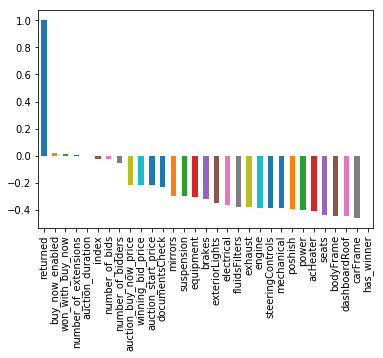

In [168]:
plt.figure()
corr_result.plot(kind='bar')

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
lr = LogisticRegression(C=5, solver='lbfgs')
# results = cross_val_score(lr, X, Y, cv=kfold)
lr.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [208]:
model_selection.cross_val_score(lr, X, Y, cv=5)

array([0.86105112, 0.86105112, 0.86095101, 0.86157174, 0.86157174])

In [207]:
result

0.8703170028818443

In [172]:
## strange

In [173]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [174]:
X.shape

(6940, 30)

In [175]:
y_pred = lin_reg.predict(X)

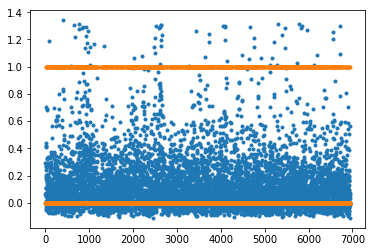

In [176]:
plt.plot(y_pred, '.')
plt.plot(Y, '.')
plt.show()

In [185]:
Y.mean()

0.1387608069164265

0.13940401953985854

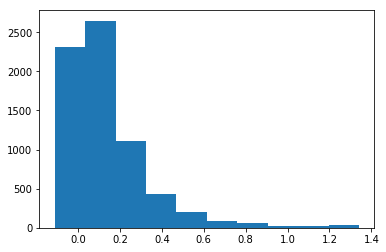

In [186]:
plt.hist(pd.DataFrame(y_pred).iloc[:,0], bins=10)
np.mean(y_pred)